#4300: Project 4: Final Project Notebook

This Notebook shall contain all the information from the previous notebooks, plus revisions



##Section 1 Plan: Dataset Preparation:


Show how the dataset is prepared:

* Show the data normalization via Standardization/
* Show how the data is split into separate training sets and validation sets for training learning.



##Section 2 Plan: Model Creation

* Create a Model and demonstrate its use with the dataset.

* Demonstrate Overfitting with a Model.

* Demonstrate results using Linear Regression instead of Sigmoid Classification.




###Section 2: Extra:

* Demonstrate the use of Model Checkpointing and Early Stopping with Dataset to reduce overtraining

##Section 3 Plan: 

* Iteratively removing input features
* Identify non-informative input features and remove them
* Comparison between feature-reduced model and the original model with all input features


##Section 1: Dataset and Preparation

###Import Resources

In [2]:
import numpy as np

import matplotlib as mp

import plotly.express as pe

import pandas as pd

import matplotlib.pyplot as plt

import random

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import operator


###Import and Display Dataset

In [3]:
url = "https://raw.githubusercontent.com/jrc8b8-png/4300-DataSets/main/spambase_final1.csv"

In [4]:
data = pd.read_csv(url,delimiter=",")

data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs:,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Unnamed: 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

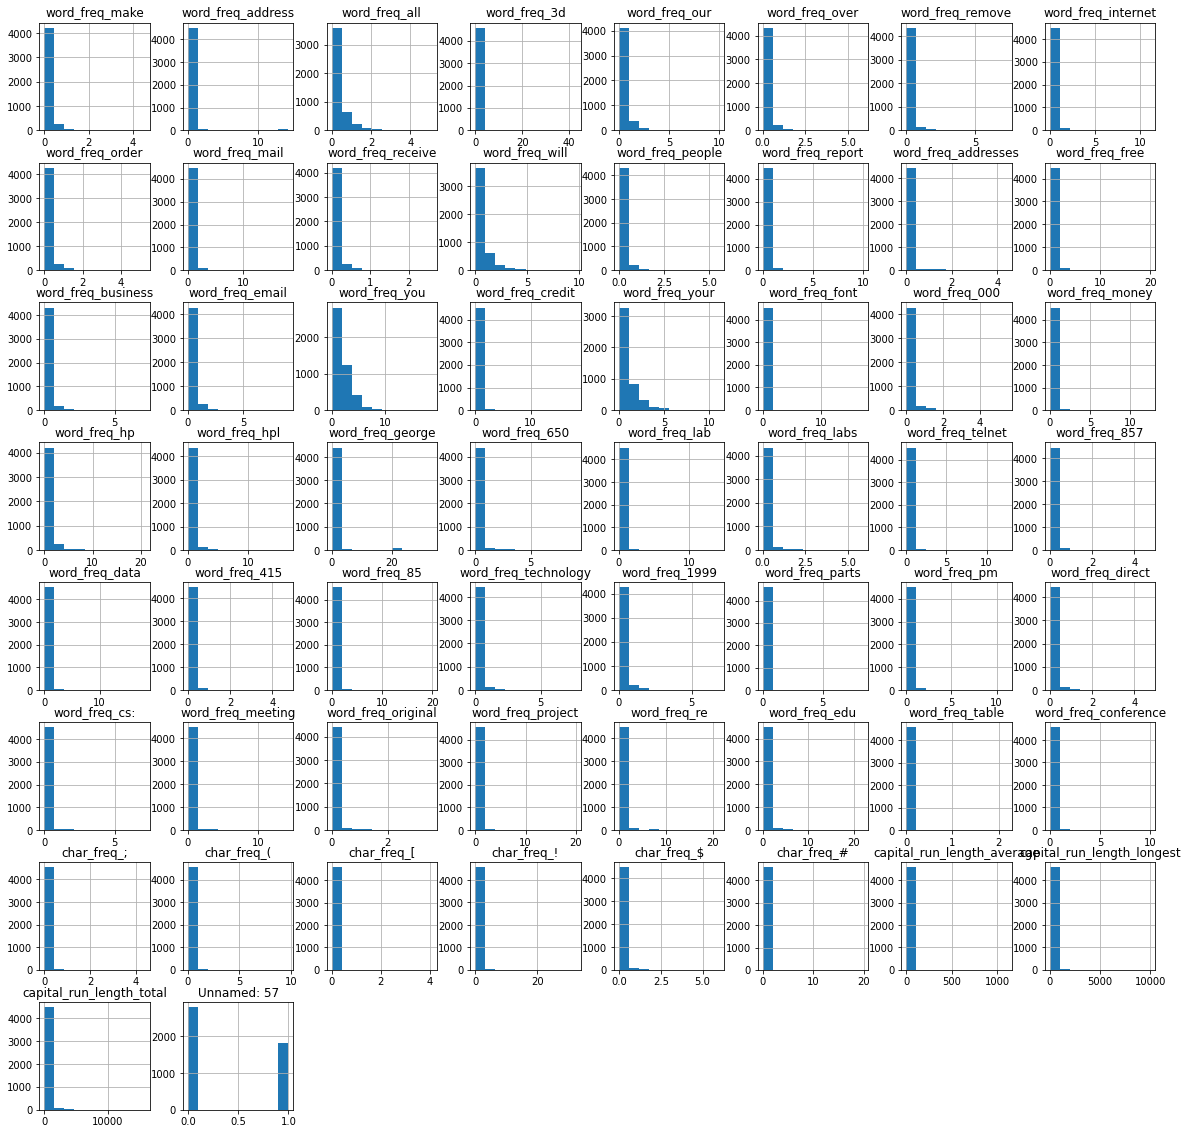

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((20,20))
data.hist()
plt.show()

###Data Preparation:  Standardization Technique

In [7]:
def standardize(dataset):

  Dmean = dataset.mean(axis = 0)
  Dstd = dataset.std(axis = 0)

  dataset -= Dmean
  

  dataset /= Dstd

  return dataset


In [8]:
dataset = np.genfromtxt(url, delimiter=",", skip_header=True)

#Shuffle
np.random.shuffle(dataset)


##Section 2: Training

In [9]:
training_size = 0.25

In [10]:
epoch_count = 256

In [11]:
print(len(dataset))

4601


In [12]:

ds = dataset.shape

print(ds[0])

testSize = round(ds[0] * training_size)

print(testSize)

XVALID = np.copy(dataset[:testSize,:-1])

YVALID = np.copy(dataset[:testSize,-1])

XTRAIN = np.copy(dataset[testSize:,:-1])

YTRAIN = np.copy(dataset[testSize:,-1])

print(XVALID)

print(XTRAIN)

print("Valid Size")
print(len(XVALID))
print("Training Size Size")
print(len(XTRAIN))
print("X Columns")
print(len(XVALID[0]))



4601
1150
[[0.000e+00 0.000e+00 0.000e+00 ... 3.890e+00 7.800e+01 2.490e+02]
 [1.300e-01 1.000e-01 5.500e-01 ... 5.108e+00 1.160e+02 3.525e+03]
 [0.000e+00 5.000e-01 2.500e-01 ... 8.972e+00 4.470e+02 6.460e+02]
 ...
 [3.000e-01 0.000e+00 0.000e+00 ... 6.125e+00 6.400e+01 3.430e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 3.600e+00 1.600e+01 7.200e+01]
 [0.000e+00 5.470e+00 0.000e+00 ... 2.035e+00 1.300e+01 5.700e+01]]
[[4.100e-01 4.100e-01 4.100e-01 ... 5.761e+00 1.310e+02 2.224e+03]
 [0.000e+00 2.600e-01 7.800e-01 ... 3.554e+00 5.400e+01 9.810e+02]
 [7.100e-01 0.000e+00 0.000e+00 ... 3.041e+00 2.600e+01 7.300e+01]
 ...
 [0.000e+00 0.000e+00 3.800e-01 ... 3.923e+00 7.800e+01 2.550e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.890e+00 1.300e+01 1.890e+02]
 [2.770e+00 0.000e+00 0.000e+00 ... 1.750e+00 6.000e+00 4.900e+01]]
Valid Size
1150
Training Size Size
3451
X Columns
57


###Model Generation Code:

In [13]:
def default_project_model(size):

  neural = Sequential()


  neural.add(Dense(6, input_dim = size, activation='relu'))
  neural.add(Dense(2, activation='relu'))
  neural.add(Dense(1, activation='sigmoid'))

  neural.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

  return neural


### Regression vs Classification

In [14]:
neural = default_project_model(len(XTRAIN[0]))

linear = Sequential()

linear.add(Dense(6, input_dim = len(XTRAIN[0,:]), activation='relu'))
linear.add(Dense(3, activation='relu'))
linear.add(Dense(1, activation='linear'))

linear.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])



In [15]:
history1 = neural.fit(XTRAIN, YTRAIN, epochs = epoch_count, validation_data = (XVALID, YVALID), verbose = 1, batch_size = 32)

Epoch 1/256
108/108 [==============================] - 0s 3ms/step - loss: 14.3704 - accuracy: 0.4103 - val_loss: 7.9249 - val_accuracy: 0.5148
Epoch 2/256
108/108 [==============================] - 0s 1ms/step - loss: 3.0220 - accuracy: 0.5607 - val_loss: 0.7097 - val_accuracy: 0.5870
Epoch 3/256
108/108 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.6105 - val_loss: 0.6851 - val_accuracy: 0.5896
Epoch 4/256
108/108 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6111 - val_loss: 0.6773 - val_accuracy: 0.5904
Epoch 5/256
108/108 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6111 - val_loss: 0.6769 - val_accuracy: 0.5904
Epoch 6/256
108/108 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6111 - val_loss: 0.6767 - val_accuracy: 0.5904
Epoch 7/256
108/108 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.6103 - val_loss: 0.6842 - val_accuracy: 0.589

In [16]:
history2 = linear.fit(XTRAIN, YTRAIN, epochs = epoch_count, validation_data = (XVALID, YVALID), verbose = 1, batch_size = 32)

Epoch 1/256
108/108 [==============================] - 0s 2ms/step - loss: 755.0255 - mse: 755.0255 - val_loss: 71.8689 - val_mse: 71.8689
Epoch 2/256
108/108 [==============================] - 0s 1ms/step - loss: 1.3632 - mse: 1.3632 - val_loss: 0.3029 - val_mse: 0.3029
Epoch 3/256
108/108 [==============================] - 0s 1ms/step - loss: 0.2704 - mse: 0.2704 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 4/256
108/108 [==============================] - 0s 1ms/step - loss: 0.2447 - mse: 0.2447 - val_loss: 0.2451 - val_mse: 0.2451
Epoch 5/256
108/108 [==============================] - 0s 1ms/step - loss: 0.2370 - mse: 0.2370 - val_loss: 0.2393 - val_mse: 0.2393
Epoch 6/256
108/108 [==============================] - 0s 1ms/step - loss: 0.2335 - mse: 0.2335 - val_loss: 0.2383 - val_mse: 0.2383
Epoch 7/256
108/108 [==============================] - 0s 1ms/step - loss: 0.2351 - mse: 0.2351 - val_loss: 0.2381 - val_mse: 0.2381
Epoch 8/256
108/108 [==============================] - 0s 1ms/s

Sigmoid Results:

In [17]:
print(neural.evaluate(XVALID, YVALID))



36/36 [==============================] - 0s 849us/step - loss: 0.6851 - accuracy: 0.5896
[0.6851094961166382, 0.5895652174949646]


Regression Results:

In [18]:
print(linear.evaluate(XVALID, YVALID))

36/36 [==============================] - 0s 758us/step - loss: 0.1103 - mse: 0.1103
[0.11028292775154114, 0.11028292775154114]


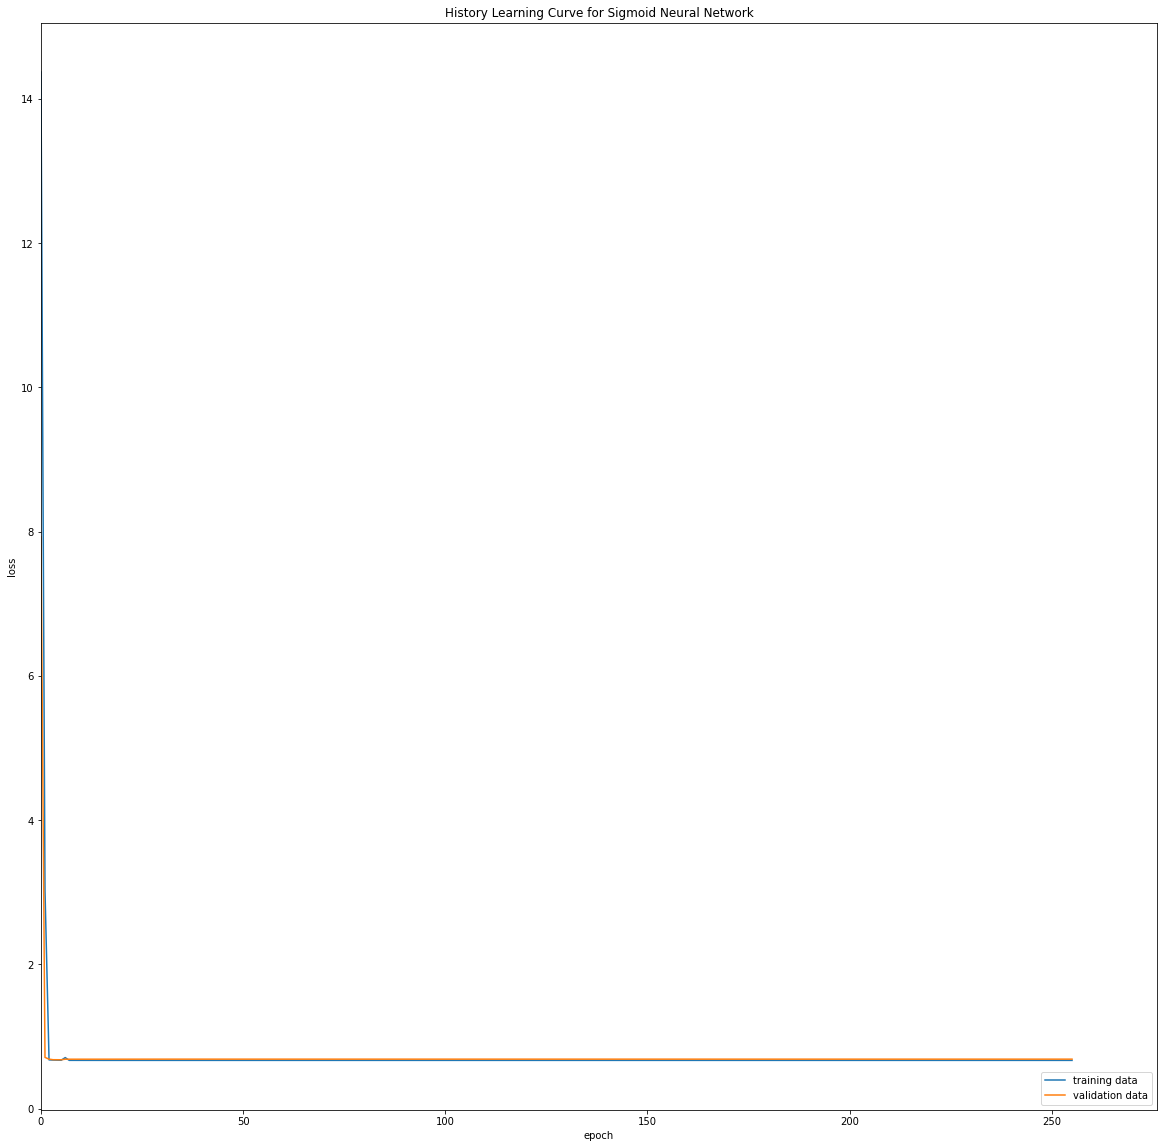

In [19]:
plt.plot(history1.history['loss']) # replace with accuracy/MAE

plt.plot(history1.history['val_loss']) # replace with val_accuracy, etc.


plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,5)

plt.title("History Learning Curve for Sigmoid Neural Network")

plt.xlim(0,epoch_count+20)

plt.legend(['training data', 'validation data'], loc='lower right')

plt.show()

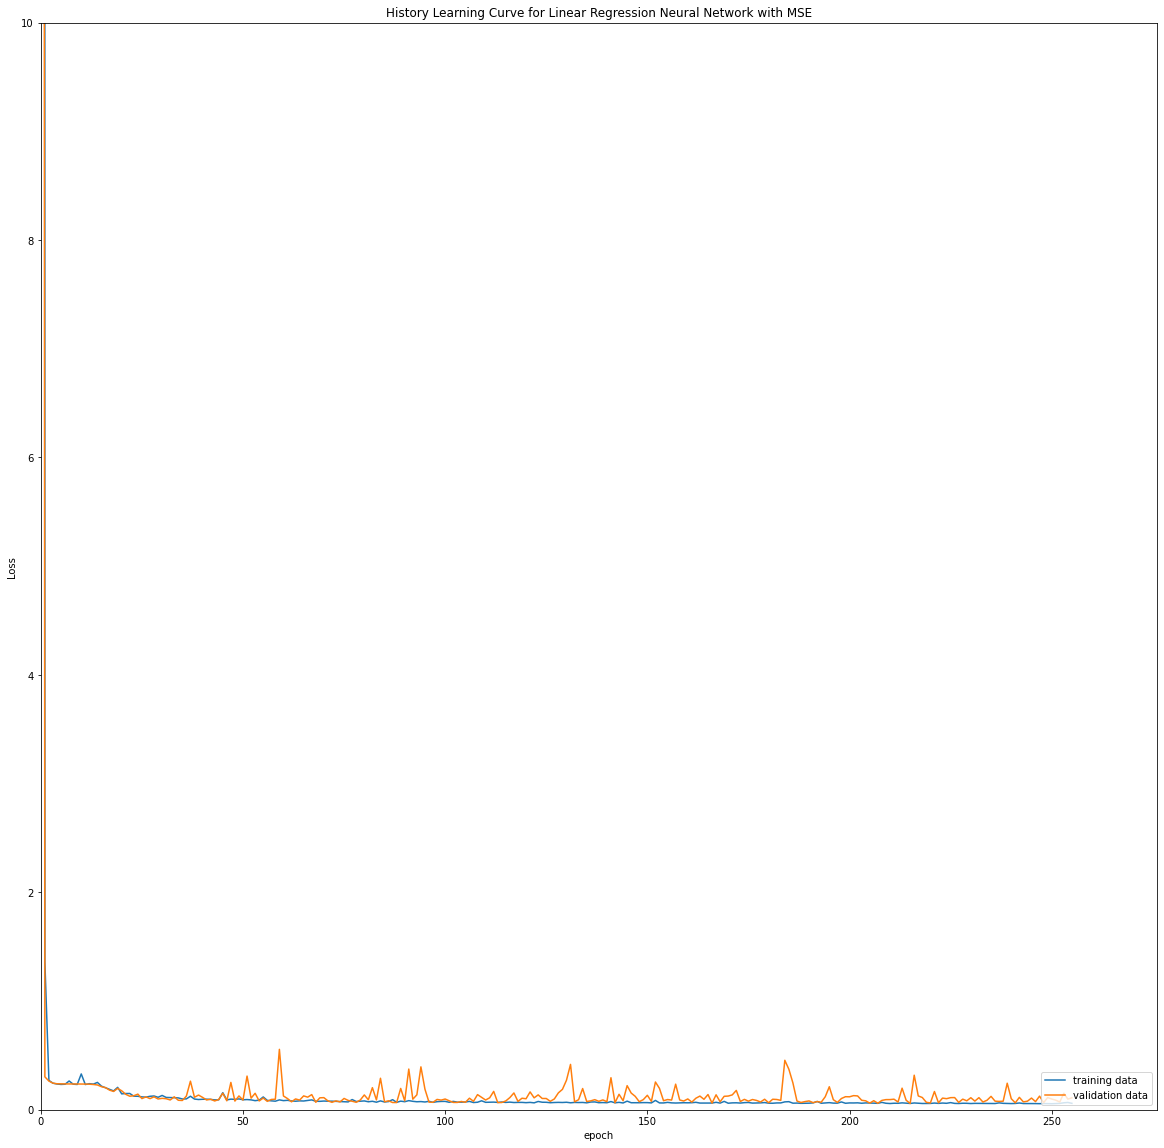

In [20]:
plt.plot(history2.history['mse']) # replace with accuracy/MAE

plt.plot(history2.history['val_mse']) # replace with val_accuracy, etc.


plt.ylabel('Loss')
plt.xlabel('epoch')
plt.xlim(1,epoch_count)

plt.ylim(0,10)



plt.title("History Learning Curve for Linear Regression Neural Network with MSE")

plt.xlim(0,epoch_count+20)

plt.legend(['training data', 'validation data'], loc='lower right')

plt.show()

###Phase 2: Extra: Model Checkpointing and Early Stopping

Demonstrate the results of a model with early stopping and model checkpointing

In [ ]:
checkPointModel = default_project_model(len(XTRAIN[0]))

checkPointModel.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
#Shuffle
np.random.shuffle(dataset)

In [ ]:
ds = dataset.shape

print(ds[0])

testSize = round(ds[0] * training_size)

print(testSize)

XVALID = np.copy(dataset[:testSize,:-1])

YVALID = np.copy(dataset[:testSize,-1])

XTRAIN = np.copy(dataset[testSize:,:-1])

YTRAIN = np.copy(dataset[testSize:,-1])

4601
1150


In [ ]:
callback_a = ModelCheckpoint(filepath = "your_model.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)

# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=100, verbose=1)


history = checkPointModel.fit((XTRAIN), (YTRAIN), epochs = 256,validation_data = ((XVALID), (YVALID)), verbose = 1, batch_size = 32, callbacks = [callback_a, callback_b])

Epoch 1/256
 80/108 [=====================>........] - ETA: 0s - loss: 0.6969 - accuracy: 0.5930
Epoch 00001: val_loss improved from inf to 0.68870, saving model to your_model.hdf5
108/108 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5874 - val_loss: 0.6887 - val_accuracy: 0.5974
Epoch 2/256
 86/108 [======================>.......] - ETA: 0s - loss: 0.6855 - accuracy: 0.6017
Epoch 00002: val_loss improved from 0.68870 to 0.68131, saving model to your_model.hdf5
108/108 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6007 - val_loss: 0.6813 - val_accuracy: 0.6070
Epoch 3/256
 87/108 [=======================>......] - ETA: 0s - loss: 0.6798 - accuracy: 0.6045
Epoch 00003: val_loss improved from 0.68131 to 0.67719, saving model to your_model.hdf5
108/108 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6042 - val_loss: 0.6772 - val_accuracy: 0.6078
Epoch 4/256
 77/108 [====================>.........] - E

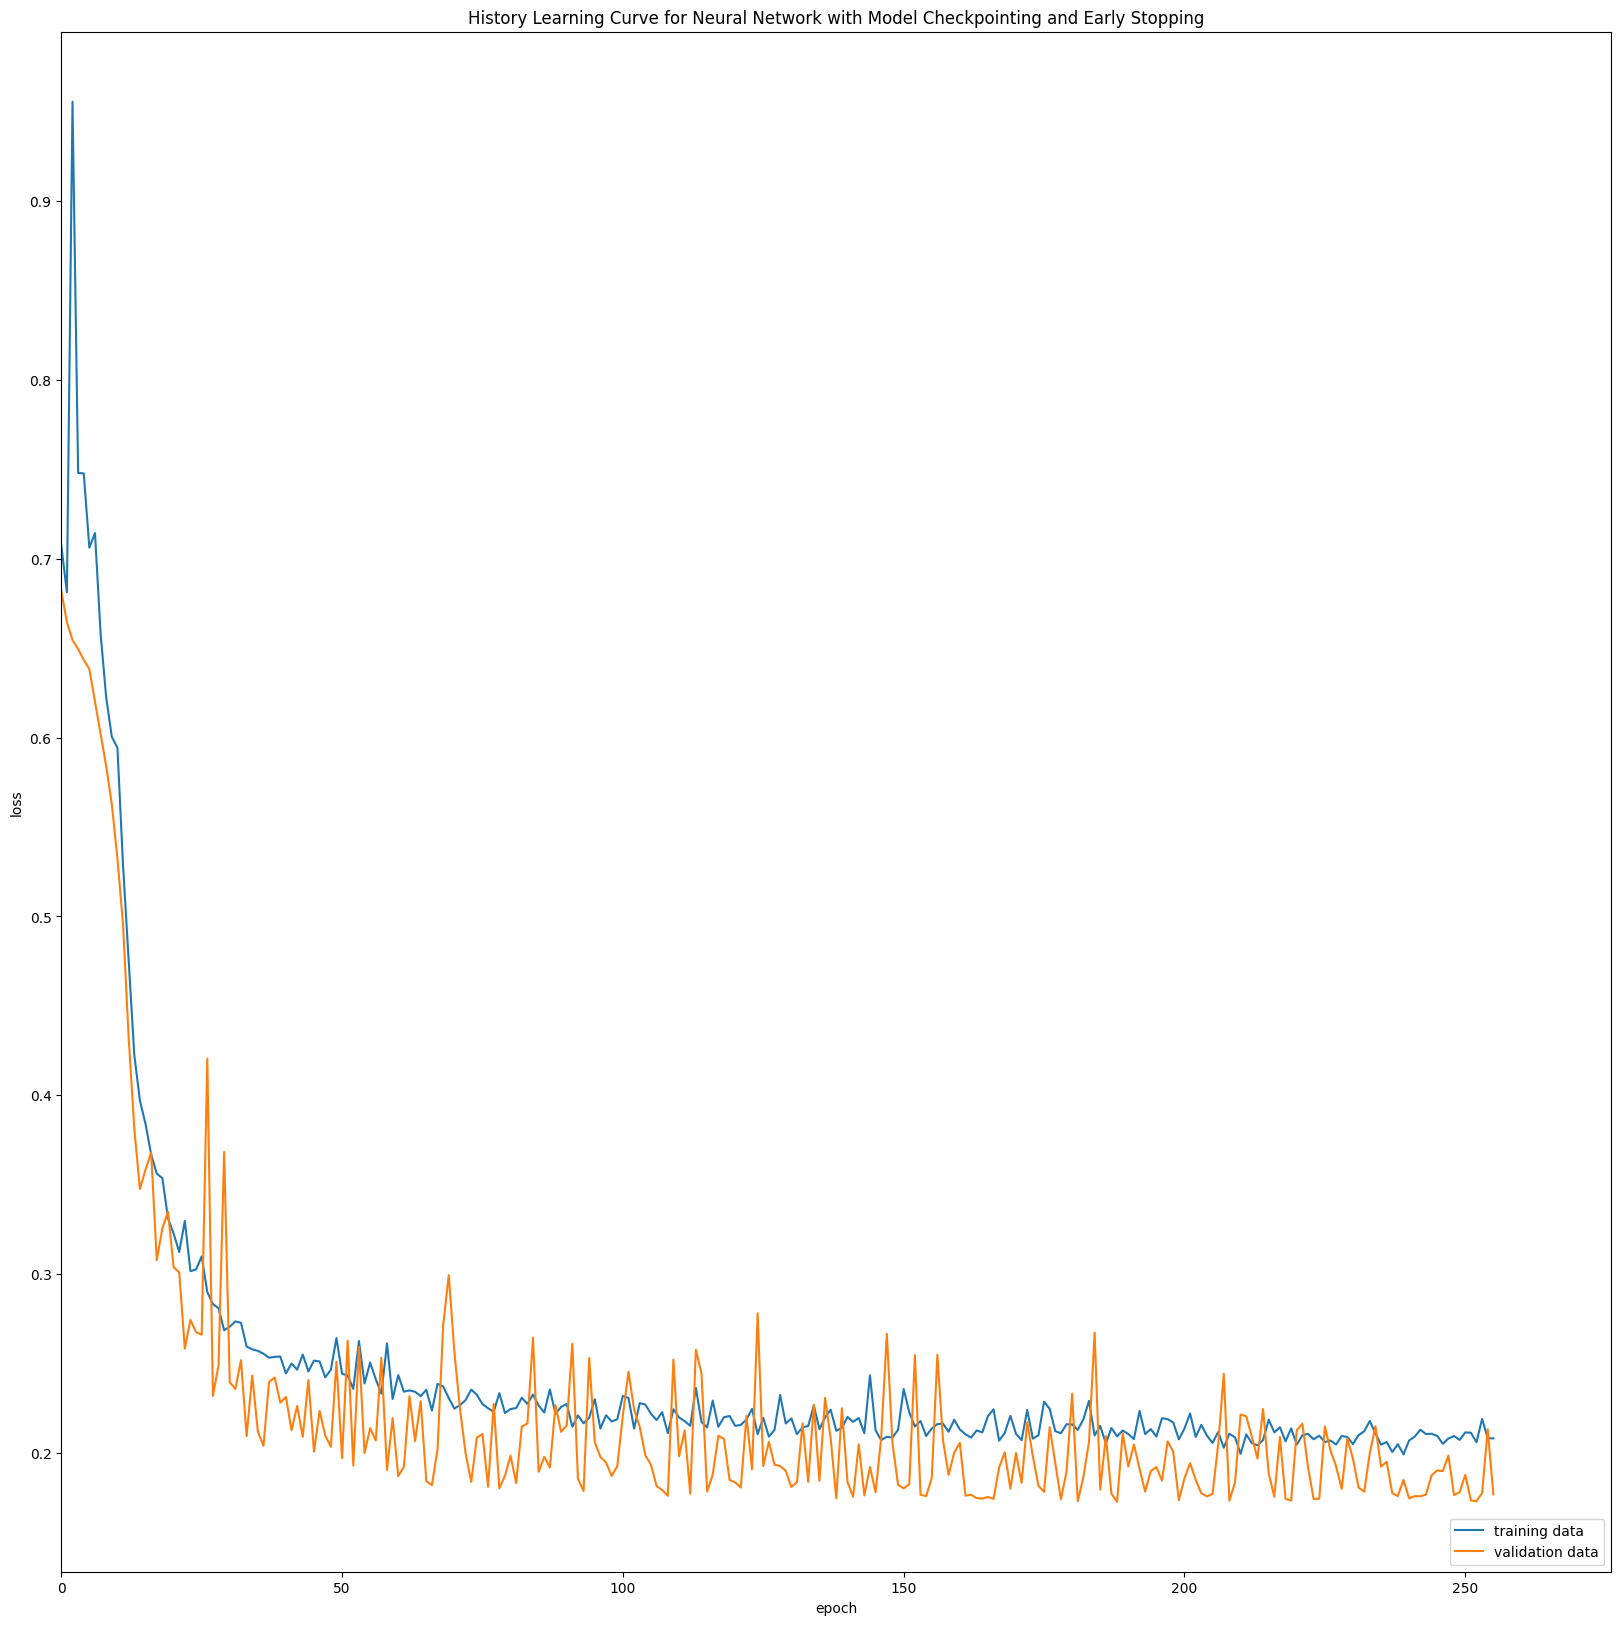

In [ ]:
plt.plot(history1.history['loss']) # replace with accuracy/MAE

plt.plot(history1.history['val_loss']) # replace with val_accuracy, etc.


plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,5)


plt.title("History Learning Curve for Neural Network with Model Checkpointing and Early Stopping")

plt.xlim(0,epoch_count+20)

plt.legend(['training data', 'validation data'], loc='lower right')

plt.show()

##Phase 3:  Iterative Feature Removal

In [ ]:
#We should make a method that gives us a model to work with.  Because for this segment, we are dealing with one input element, we may need to adjust the layers a smidge.
def getSingleFeatureModel():

  model = Sequential()

  model.add(Dense(1, input_dim = 1, activation='elu'))
  model.add(Dense(1, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

  return model


In [ ]:
np.random.shuffle(dataset)



In [ ]:
datasetLength = len(dataset)

In [ ]:
validSetSize = round(datasetLength * training_size)

In [ ]:
XTRAIN = np.copy(dataset[validSetSize:, :-1])

YTRAIN = np.copy(dataset[validSetSize:, -1])

YVALID = np.copy(dataset[:validSetSize, -1])

XVALID = np.copy(dataset[:validSetSize, :-1])

print(len(XTRAIN))
print(len(XVALID))

3451
1150


In [ ]:
acc_list = []

In [ ]:
for i in range(0, len(XTRAIN[0])):

  # File name must be in quotes
  callback_a = ModelCheckpoint(filepath = "your_model.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)

  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

  

  model = getSingleFeatureModel()

  history = model.fit((XTRAIN[:,i]), (YTRAIN), epochs = 128,validation_data = ((XVALID[:,i]), (YVALID)), verbose = 1, batch_size = 32, callbacks = [callback_a, callback_b])

  acc = model.evaluate(XVALID[:,i], YVALID)[1]

  acc_list.append(acc)






Streaming output truncated to the last 5000 lines.
 94/108 [=========================>....] - ETA: 0s - loss: 0.6734 - accuracy: 0.5987
Epoch 00009: val_loss did not improve from 0.66468
108/108 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6010 - val_loss: 0.6648 - val_accuracy: 0.6209
Epoch 10/128
108/108 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.6010
Epoch 00010: val_loss did not improve from 0.66468
108/108 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6010 - val_loss: 0.6648 - val_accuracy: 0.6209
Epoch 11/128
 82/108 [=====================>........] - ETA: 0s - loss: 0.6711 - accuracy: 0.6040
Epoch 00011: val_loss did not improve from 0.66468
108/108 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6010 - val_loss: 0.6647 - val_accuracy: 0.6209
Epoch 12/128
 77/108 [====================>.........] - ETA: 0s - loss: 0.6724 - accuracy: 0.6006
Epoch 00012: val_loss di

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()

In [ ]:
print(data.columns)

columns = data.columns

columns = columns[0:-1]

y_pos = np.arange(len(columns))

print(y_pos)
print(len(y_pos))

print(len(columns))

print(len(acc_list))

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs:',
       'word_freq_meeting', 'word_freq_original', 'word_freq_project',
       'word_freq_re', 'word_freq_edu', 'word_freq_table',
       'word_freq_confe

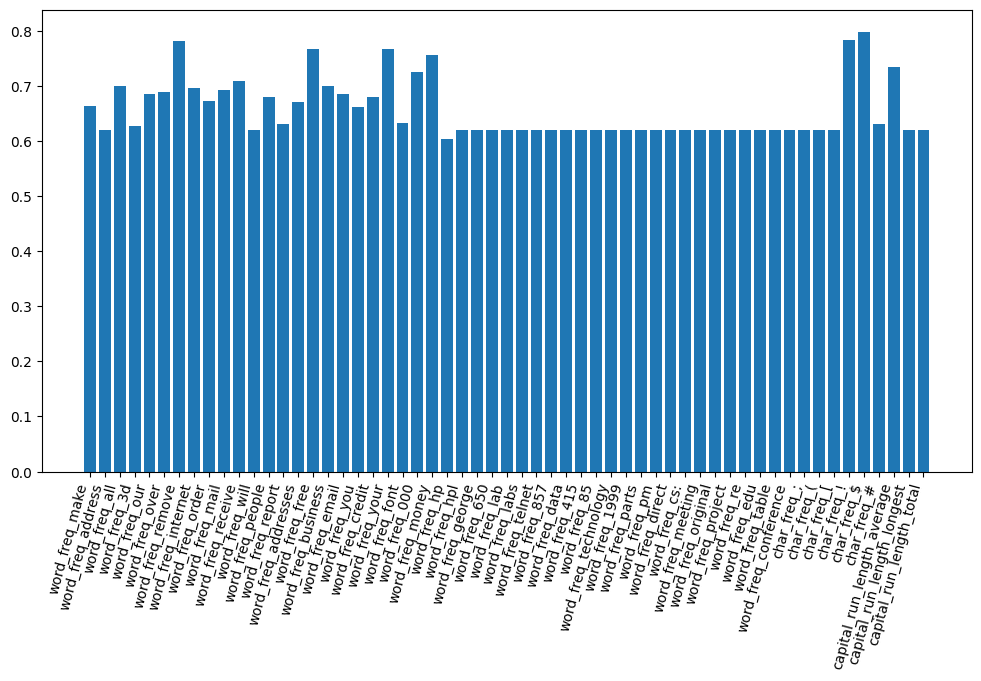

In [ ]:
plt.figure(figsize=(12,6))

plt.bar(columns, acc_list)

plt.xticks(rotation=75, ha='right')

plt.show()

In [ ]:
import operator

dict1 = {}

for i in range(0, len(columns)):
  dict1[columns[i]] = acc_list[i]

sorted_dict = sorted(dict1.items(), key=operator.itemgetter(1))



print(sorted_dict)

[('word_freq_hp', 0.6034782528877258), ('word_freq_address', 0.6208695769309998), ('word_freq_will', 0.6208695769309998), ('word_freq_hpl', 0.6208695769309998), ('word_freq_george', 0.6208695769309998), ('word_freq_650', 0.6208695769309998), ('word_freq_lab', 0.6208695769309998), ('word_freq_labs', 0.6208695769309998), ('word_freq_telnet', 0.6208695769309998), ('word_freq_857', 0.6208695769309998), ('word_freq_data', 0.6208695769309998), ('word_freq_415', 0.6208695769309998), ('word_freq_85', 0.6208695769309998), ('word_freq_technology', 0.6208695769309998), ('word_freq_1999', 0.6208695769309998), ('word_freq_parts', 0.6208695769309998), ('word_freq_pm', 0.6208695769309998), ('word_freq_direct', 0.6208695769309998), ('word_freq_cs:', 0.6208695769309998), ('word_freq_meeting', 0.6208695769309998), ('word_freq_original', 0.6208695769309998), ('word_freq_project', 0.6208695769309998), ('word_freq_re', 0.6208695769309998), ('word_freq_edu', 0.6208695769309998), ('word_freq_table', 0.620869

In [ ]:
list1 = []

list2 = []

for i in sorted_dict:
  list1.append(i[0])
  list2.append(i[1])

print(list1)
print(list2)  

['word_freq_hp', 'word_freq_address', 'word_freq_will', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs:', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'capital_run_length_longest', 'capital_run_length_total', 'word_freq_3d', 'word_freq_report', 'char_freq_#', 'word_freq_font', 'word_freq_you', 'word_freq_make', 'word_freq_addresses', 'word_freq_order', 'word_freq_people', 'word_freq_credit', 'word_freq_email', 'word_freq_our', 'word_freq_over', 'word_freq_mail', 'word_freq_internet', 'word_freq_all', 'word_freq_business', 'word_freq_receive', 'word_freq_000', 'capital_run_length_average', 'word_freq_money', 'wor

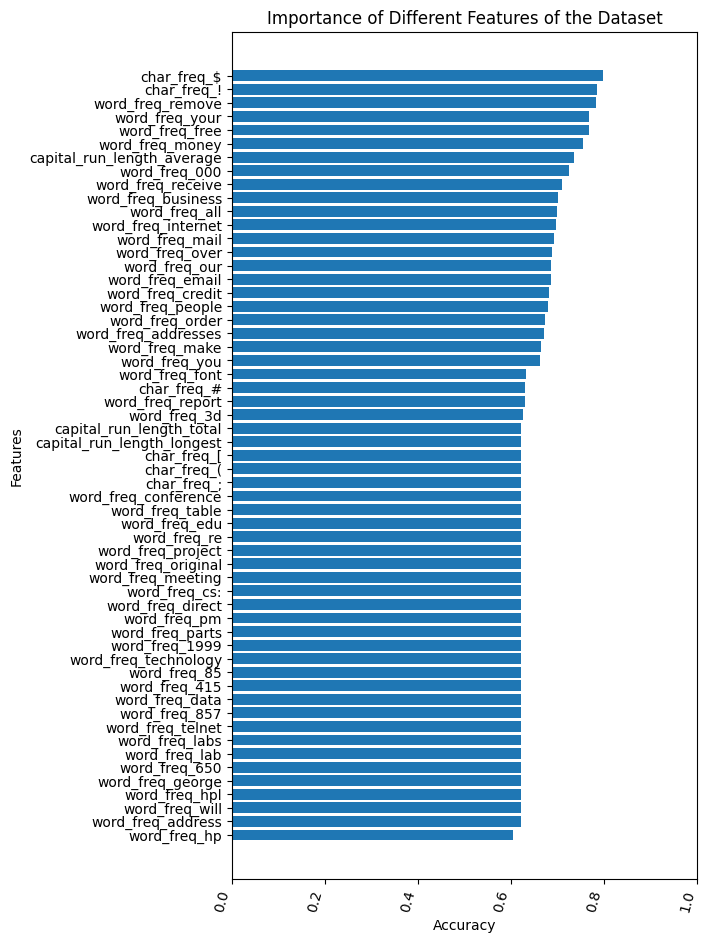

In [ ]:
plt.figure(figsize=(6,11))

plt.barh(list1, list2)

plt.title("Importance of Different Features of the Dataset")

plt.xlabel("Accuracy")

plt.xlim(0.0, 1)

plt.ylabel("Features")

plt.xticks(rotation=75, ha='right')

plt.show()

Model

In [ ]:
def P2_Neural_Model(currentLength):
  model = Sequential()

  model.add(Dense(5, input_dim = currentLength, activation='elu'))
  model.add(Dense(2, activation='elu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

  return model
 

In [ ]:
numberList = np.arange(len(columns))

In [ ]:
featureTupleList = []

for i in range(0, len(columns)):

  featureTupleList.append((numberList[i],columns[i],acc_list[i]))



print(featureTupleList)  


sortedTupleList = sorted(featureTupleList, key=operator.itemgetter(2), reverse=False)

print(sortedTupleList)

[(0, 'word_freq_make', 0.6643478274345398), (1, 'word_freq_address', 0.6208695769309998), (2, 'word_freq_all', 0.699999988079071), (3, 'word_freq_3d', 0.6269565224647522), (4, 'word_freq_our', 0.6860869526863098), (5, 'word_freq_over', 0.6886956691741943), (6, 'word_freq_remove', 0.782608687877655), (7, 'word_freq_internet', 0.6973913311958313), (8, 'word_freq_order', 0.6730434894561768), (9, 'word_freq_mail', 0.6921738982200623), (10, 'word_freq_receive', 0.7095652222633362), (11, 'word_freq_will', 0.6208695769309998), (12, 'word_freq_people', 0.6800000071525574), (13, 'word_freq_report', 0.6304348111152649), (14, 'word_freq_addresses', 0.6713043451309204), (15, 'word_freq_free', 0.7669565081596375), (16, 'word_freq_business', 0.7008695602416992), (17, 'word_freq_email', 0.6852173805236816), (18, 'word_freq_you', 0.6626086831092834), (19, 'word_freq_credit', 0.6808695793151855), (20, 'word_freq_your', 0.7678260803222656), (21, 'word_freq_font', 0.6330434679985046), (22, 'word_freq_000

In [ ]:
featureNumber = len(XTRAIN[0])

In [ ]:
export2_stringList = []
export2_array = []

In [ ]:
model = P2_Neural_Model(featureNumber)

# File name must be in quotes
callback_a = ModelCheckpoint(filepath = "your_model.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)

# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=80, verbose=1)

history = model.fit((XTRAIN), (YTRAIN), epochs = 256,validation_data = ((XVALID), (YVALID)), verbose = 1, batch_size = 32, callbacks = [callback_a, callback_b])


export2_stringList.append("Procedure with all Features.")

export2_array.append(model.evaluate(XTRAIN, YTRAIN)[1])

Epoch 1/256
108/108 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.6552 - val_loss: 0.5068 - val_accuracy: 0.7435
Epoch 2/256
108/108 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7595 - val_loss: 0.4551 - val_accuracy: 0.7748
Epoch 3/256
108/108 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7867 - val_loss: 0.4248 - val_accuracy: 0.7922
Epoch 4/256
108/108 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8001 - val_loss: 0.4282 - val_accuracy: 0.7861
Epoch 5/256
108/108 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8114 - val_loss: 0.4455 - val_accuracy: 0.7922
Epoch 6/256
108/108 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8221 - val_loss: 0.3530 - val_accuracy: 0.8339
Epoch 7/256
108/108 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8557 - val_loss: 0.3218 - val_accuracy: 0.8591

## Accuracy of the Dataset with ALL Input features + Callbacks and Early Stopping

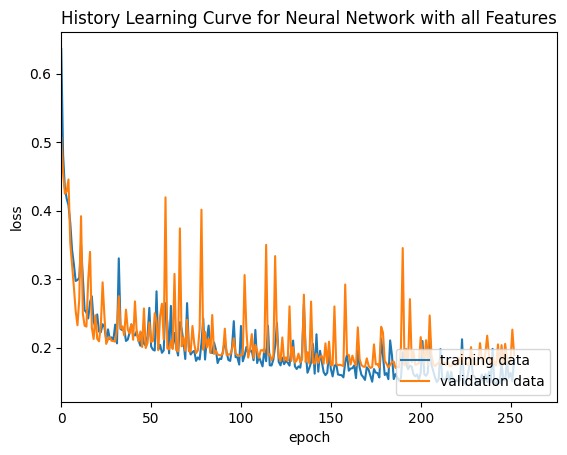

In [ ]:
plt.plot(history.history['loss']) # replace with accuracy/MAE

plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.


plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,5)

plt.title("History Learning Curve for Neural Network with all Features")

plt.xlim(0,256+20)

plt.legend(['training data', 'validation data'], loc='lower right')

plt.show()

##Second Step: Compare the following:

Accuracy of Dataset with all features ***v.s.*** Accuracy of Dataset with unimportant features removed.

In [ ]:
experiment_limit = 11

experiment_removals = 5

In [ ]:
featureTupleList = []

for i in range(0, len(columns)):

  featureTupleList.append((numberList[i],columns[i],acc_list[i]))



print(featureTupleList)  


sortedTupleList = sorted(featureTupleList, key=operator.itemgetter(2), reverse=False)

print(sortedTupleList)



[(0, 'word_freq_make', 0.6643478274345398), (1, 'word_freq_address', 0.6208695769309998), (2, 'word_freq_all', 0.699999988079071), (3, 'word_freq_3d', 0.6269565224647522), (4, 'word_freq_our', 0.6860869526863098), (5, 'word_freq_over', 0.6886956691741943), (6, 'word_freq_remove', 0.782608687877655), (7, 'word_freq_internet', 0.6973913311958313), (8, 'word_freq_order', 0.6730434894561768), (9, 'word_freq_mail', 0.6921738982200623), (10, 'word_freq_receive', 0.7095652222633362), (11, 'word_freq_will', 0.6208695769309998), (12, 'word_freq_people', 0.6800000071525574), (13, 'word_freq_report', 0.6304348111152649), (14, 'word_freq_addresses', 0.6713043451309204), (15, 'word_freq_free', 0.7669565081596375), (16, 'word_freq_business', 0.7008695602416992), (17, 'word_freq_email', 0.6852173805236816), (18, 'word_freq_you', 0.6626086831092834), (19, 'word_freq_credit', 0.6808695793151855), (20, 'word_freq_your', 0.7678260803222656), (21, 'word_freq_font', 0.6330434679985046), (22, 'word_freq_000

In [ ]:
name_list = []

for i in range(0, len(sortedTupleList)):
  name_list.append(sortedTupleList[i][1])

print(name_list)  

['word_freq_hp', 'word_freq_address', 'word_freq_will', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs:', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'capital_run_length_longest', 'capital_run_length_total', 'word_freq_3d', 'word_freq_report', 'char_freq_#', 'word_freq_font', 'word_freq_you', 'word_freq_make', 'word_freq_addresses', 'word_freq_order', 'word_freq_people', 'word_freq_credit', 'word_freq_email', 'word_freq_our', 'word_freq_over', 'word_freq_mail', 'word_freq_internet', 'word_freq_all', 'word_freq_business', 'word_freq_receive', 'word_freq_000', 'capital_run_length_average', 'word_freq_money', 'wor

In [ ]:
name_list.reverse()

In [ ]:
print(name_list)

['char_freq_$', 'char_freq_!', 'word_freq_remove', 'word_freq_your', 'word_freq_free', 'word_freq_money', 'capital_run_length_average', 'word_freq_000', 'word_freq_receive', 'word_freq_business', 'word_freq_all', 'word_freq_internet', 'word_freq_mail', 'word_freq_over', 'word_freq_our', 'word_freq_email', 'word_freq_credit', 'word_freq_people', 'word_freq_order', 'word_freq_addresses', 'word_freq_make', 'word_freq_you', 'word_freq_font', 'char_freq_#', 'word_freq_report', 'word_freq_3d', 'capital_run_length_total', 'capital_run_length_longest', 'char_freq_[', 'char_freq_(', 'char_freq_;', 'word_freq_conference', 'word_freq_table', 'word_freq_edu', 'word_freq_re', 'word_freq_project', 'word_freq_original', 'word_freq_meeting', 'word_freq_cs:', 'word_freq_direct', 'word_freq_pm', 'word_freq_parts', 'word_freq_1999', 'word_freq_technology', 'word_freq_85', 'word_freq_415', 'word_freq_data', 'word_freq_857', 'word_freq_telnet', 'word_freq_labs', 'word_freq_lab', 'word_freq_650', 'word_freq

In [ ]:
historyList = []

In [ ]:
data2 = pd.read_csv(url, delimiter=',')

In [ ]:
for i in range(0, experiment_limit):
  for j in range(0,experiment_removals):
      currentString = name_list.pop()
      data2 = data2.drop(currentString, axis="columns")
      

  dataset_np = data2.values
  print(dataset_np.shape)

  XTRAIN2 = np.copy(dataset[:validSetSize, :-1])
  XVALID2 = np.copy(dataset[validSetSize:, :-1])

  YTRAIN2 = np.copy(dataset[:validSetSize, -1])
  YVALID2 = np.copy(dataset[validSetSize:, -1])

  xStd = XTRAIN2.std(axis = 0)
  xMean = XTRAIN2.mean(axis = 0)

  XTRAIN2 = standardize(XTRAIN2)

  XVALID2 = standardize(XVALID2)

  model = P2_Neural_Model(len(XTRAIN2[0]))

  # File name must be in quotes
  callback_a = ModelCheckpoint(filepath = "your_model.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)

  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=128, verbose=1)

  history = model.fit((XTRAIN2), (YTRAIN2), epochs = 256,validation_data = ((XVALID2), (YVALID2)), verbose = 0, batch_size = 32, callbacks = [callback_a, callback_b])

  historyList.append(history)

  export2_stringList.append("Procedure with " + str((i+1)*experiment_removals) + " features removed.")
  export2_array.append(model.evaluate(XVALID2, YVALID2)[1])

 



(4601, 53)
Epoch 00168: early stopping
108/108 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.9267
(4601, 48)
Epoch 00189: early stopping
108/108 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.9215
(4601, 43)
Epoch 00165: early stopping
108/108 [==============================] - 0s 885us/step - loss: 0.3402 - accuracy: 0.9200
(4601, 38)
Epoch 00166: early stopping
108/108 [==============================] - 0s 861us/step - loss: 0.3491 - accuracy: 0.9180
(4601, 33)
Epoch 00185: early stopping
108/108 [==============================] - 0s 872us/step - loss: 0.3361 - accuracy: 0.9206
(4601, 28)
Epoch 00158: early stopping
108/108 [==============================] - 0s 1ms/step - loss: 0.2867 - accuracy: 0.9276
(4601, 23)
Epoch 00171: early stopping
108/108 [==============================] - 0s 993us/step - loss: 0.3458 - accuracy: 0.9247
(4601, 18)
Epoch 00162: early stopping
108/108 [==============================] - 0s 1ms/step - 

In [ ]:
print(export2_stringList)
print(export2_array)

['Procedure with all Features.', 'Procedure with 5 features removed.', 'Procedure with 10 features removed.', 'Procedure with 15 features removed.', 'Procedure with 20 features removed.', 'Procedure with 25 features removed.', 'Procedure with 30 features removed.', 'Procedure with 35 features removed.', 'Procedure with 40 features removed.', 'Procedure with 45 features removed.', 'Procedure with 50 features removed.', 'Procedure with 55 features removed.']
[0.9420458078384399, 0.9266878962516785, 0.9214720129966736, 0.9200232028961182, 0.9179947972297668, 0.9206027388572693, 0.9275572299957275, 0.9246594905853271, 0.919443666934967, 0.9188640713691711, 0.9203129410743713, 0.9237902164459229]


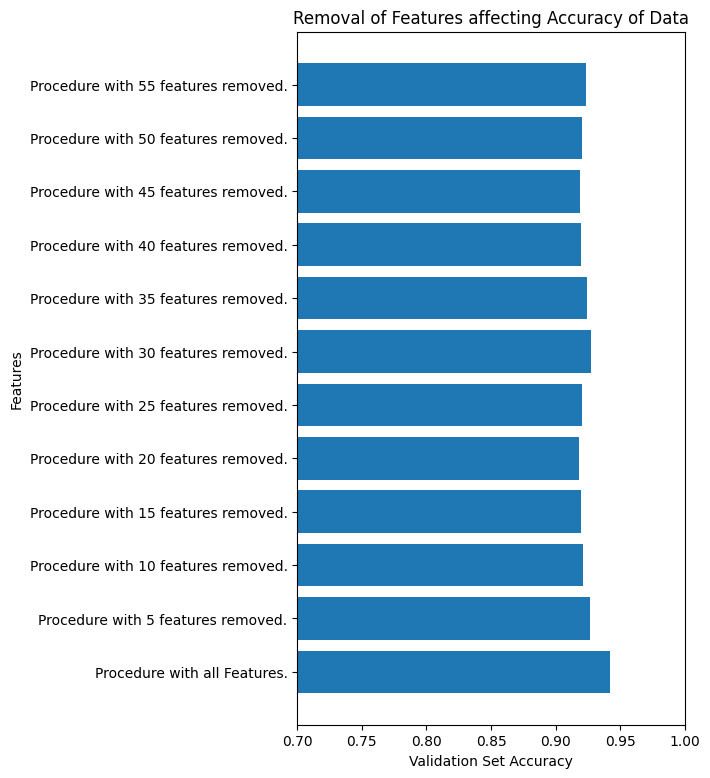

In [ ]:
plt.figure(figsize=(5,9))


plt.barh(export2_stringList, export2_array)

plt.title("Removal of Features affecting Accuracy of Data")

plt.xlabel("Validation Set Accuracy")

plt.xlim(0.7, 1)

plt.ylabel("Features")

plt.show()

###Comparison with different history graphs

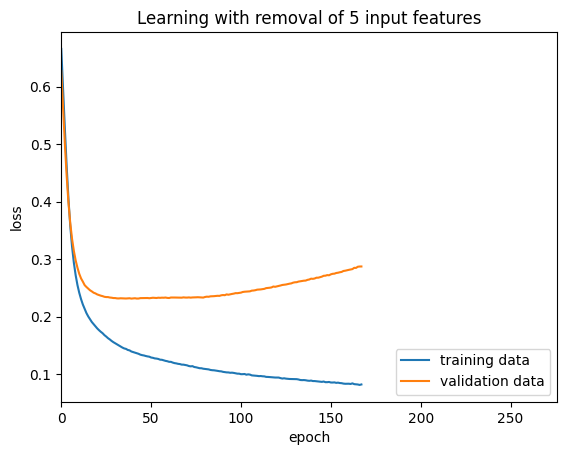

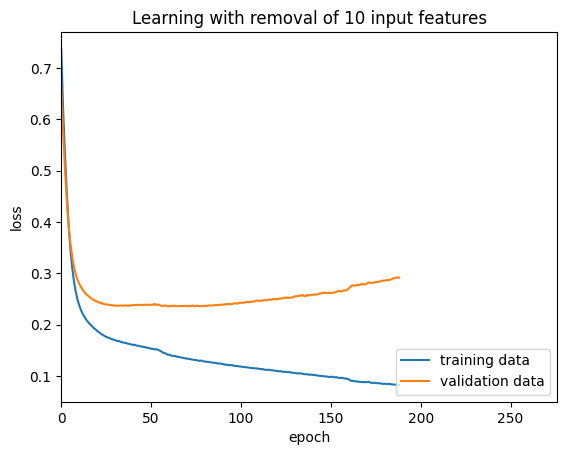

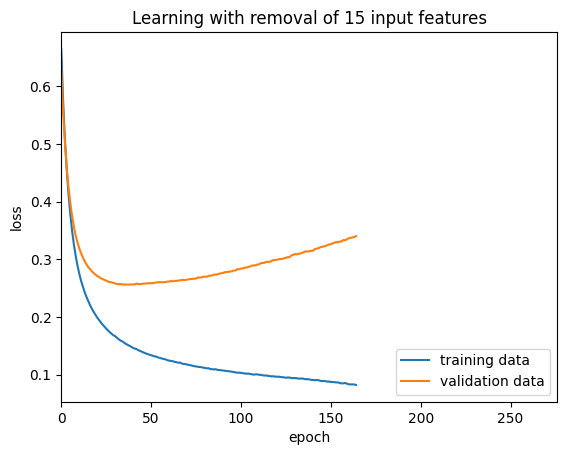

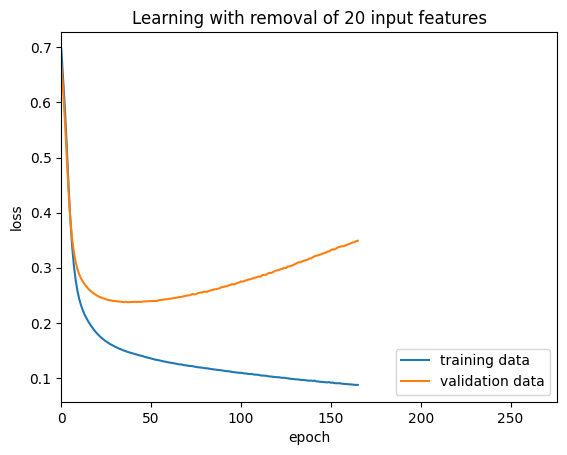

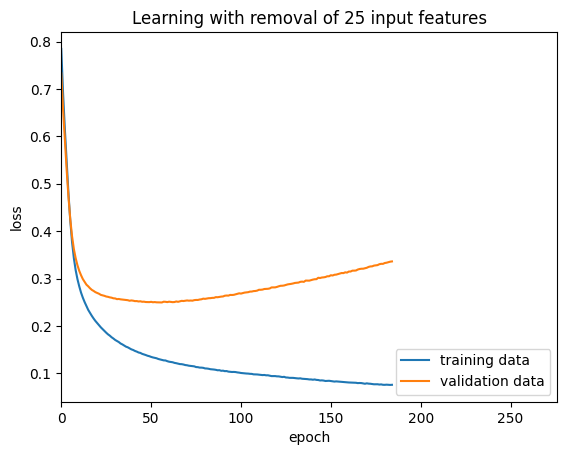

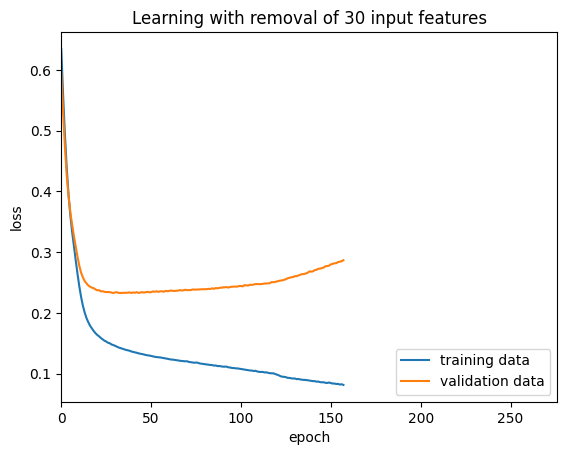

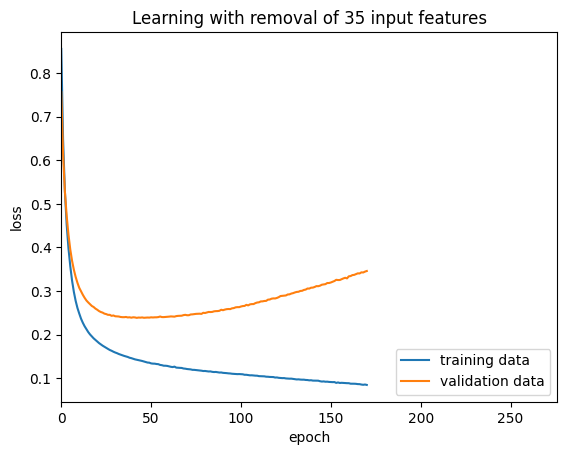

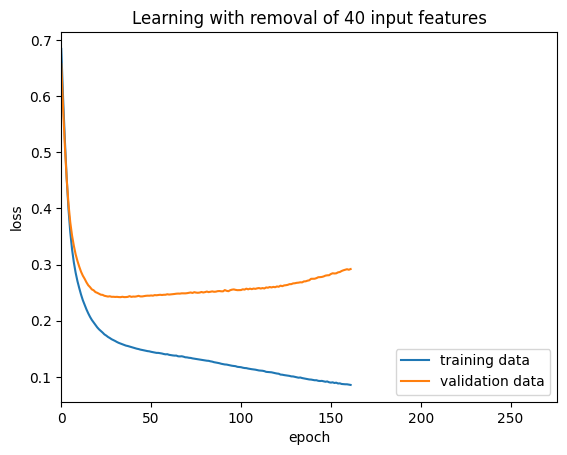

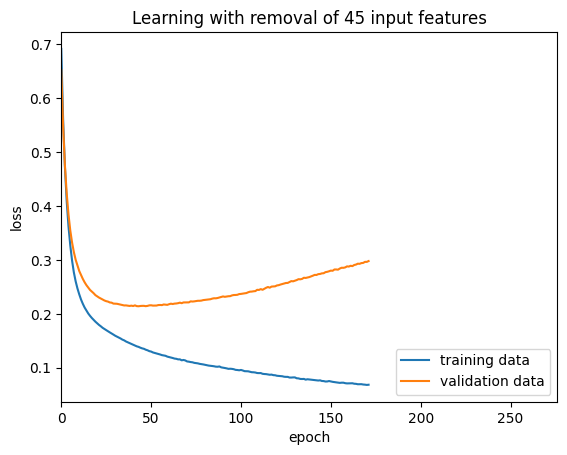

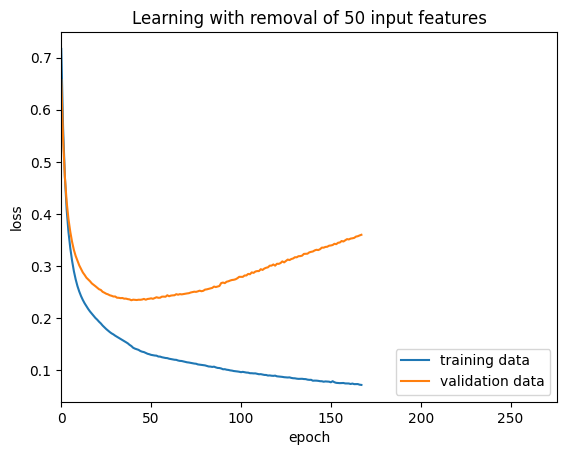

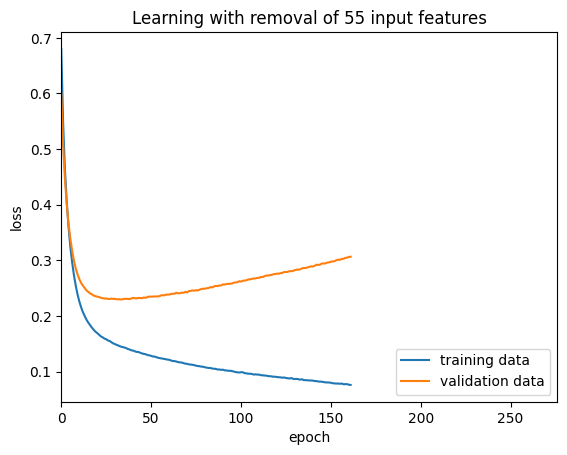

In [ ]:
for i in range(0, len(historyList)):

  plt.plot(historyList[i].history['loss']) # replace with accuracy/MAE

  plt.plot(historyList[i].history['val_loss']) # replace with val_accuracy, etc.

  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.xlim(0,5)

  plt.title("Learning with removal of " + str((i+1)*experiment_removals) + " input features")

  plt.xlim(0,256+20)

  plt.legend(['training data', 'validation data'], loc='lower right')

  plt.show()